In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('ASOS.csv', index_col=0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[129], inplace=True)

In [3]:
start = datetime.datetime.strptime("2006-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,129)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [4]:
df.columns= ['GSO_LF','GSO_UR','CLT_LF', 'CLT_UR', 'RDU_LF',
             'RDU_UR', 'Harrisburg_LF', 'Harrisburg_UR', 'USA_LF',
             'USA_UR']

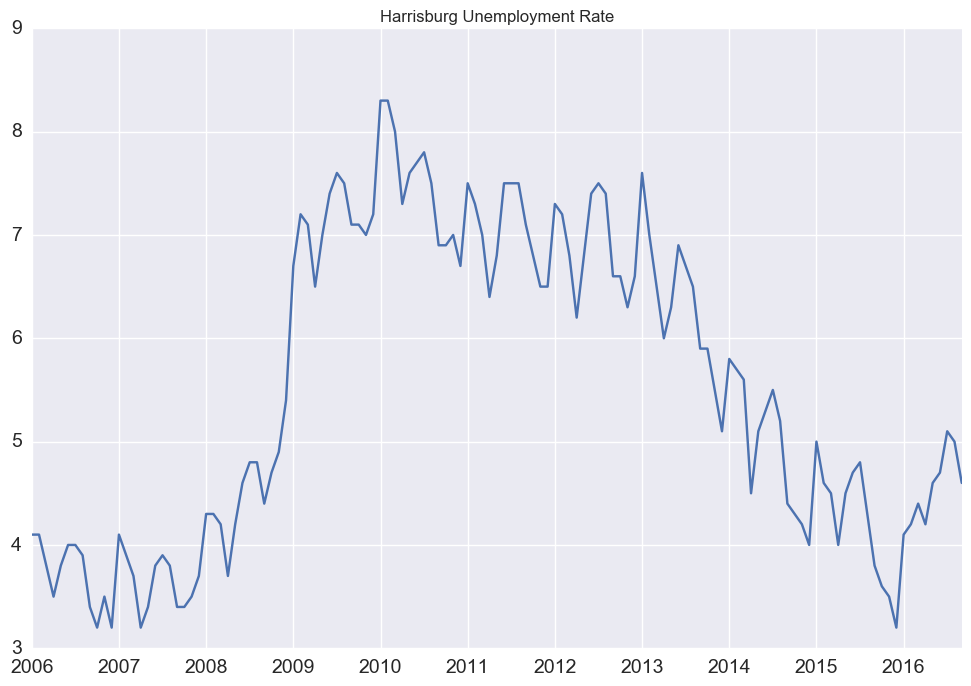

In [5]:
df.Harrisburg_UR.plot(figsize=(12,8), title= 'Harrisburg Unemployment Rate', fontsize=14)
#plt.savefig('month_ridership.png', bbox_inches='tight')

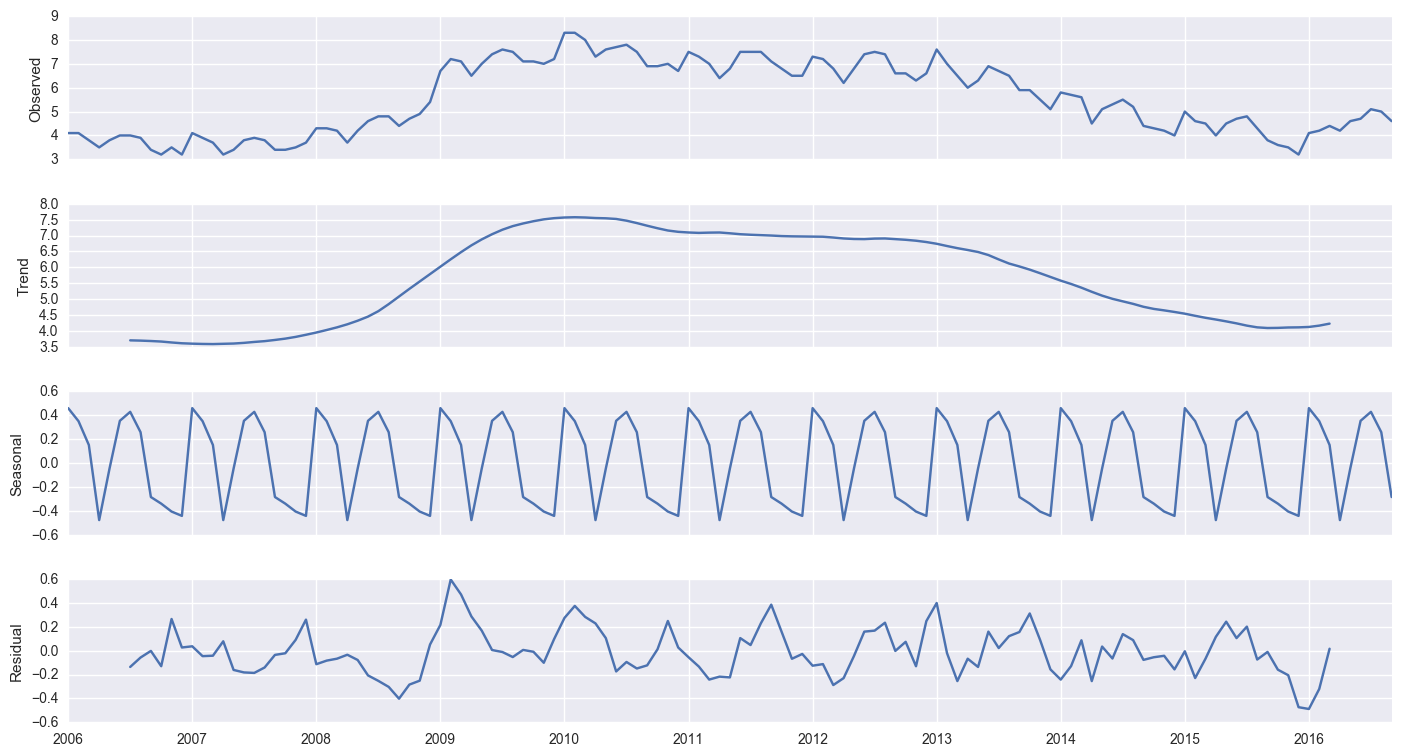

In [6]:
decomposition_Harrisburg = seasonal_decompose(df.Harrisburg_UR, freq=12)  
fig = plt.figure()  
fig = decomposition_Harrisburg.plot()  
fig.set_size_inches(15, 8)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


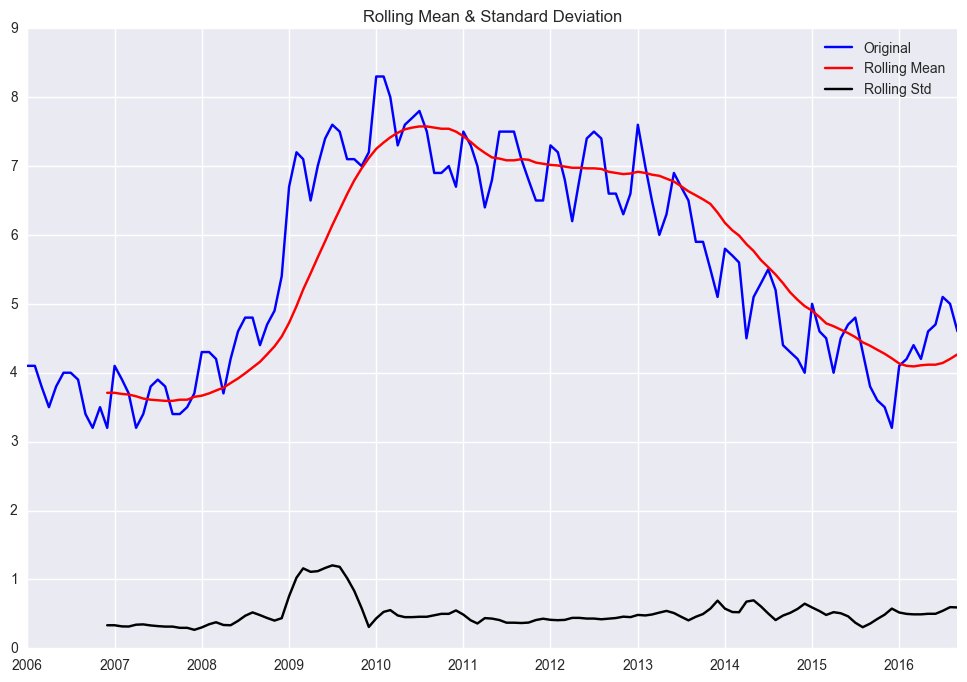

Results of Dickey-Fuller Test:
Test Statistic                  -2.907880
p-value                          0.044439
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [9]:
test_stationarity(df.Harrisburg_UR)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


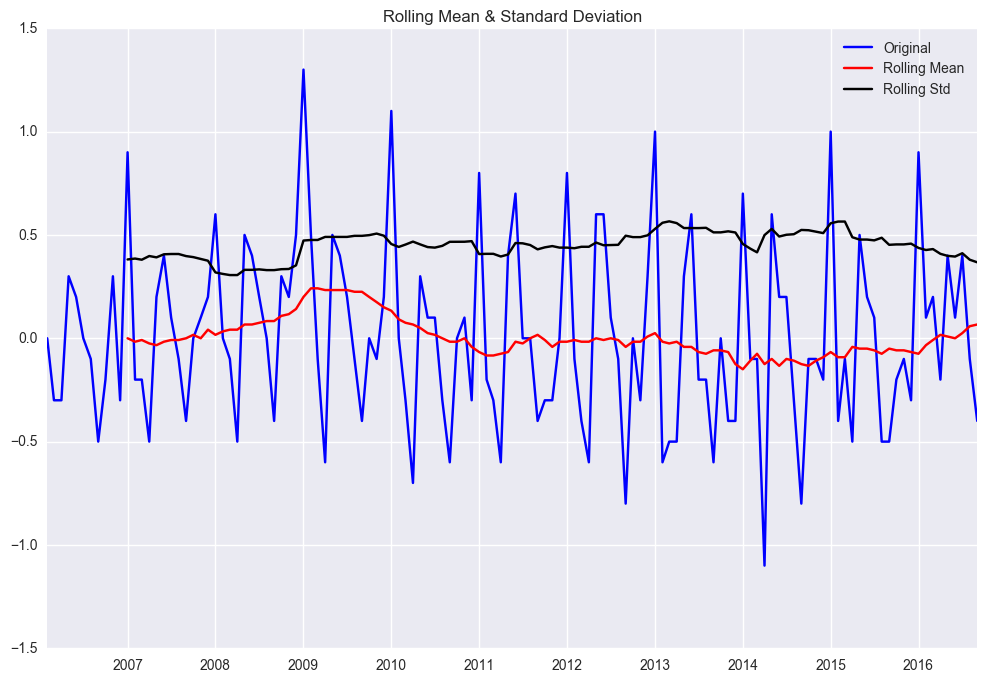

Results of Dickey-Fuller Test:
Test Statistic                  -1.357003
p-value                          0.602707
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [10]:
df['Harrisburg_first_difference'] = df.Harrisburg_UR - df.Harrisburg_UR.shift(1)  
test_stationarity(df.Harrisburg_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


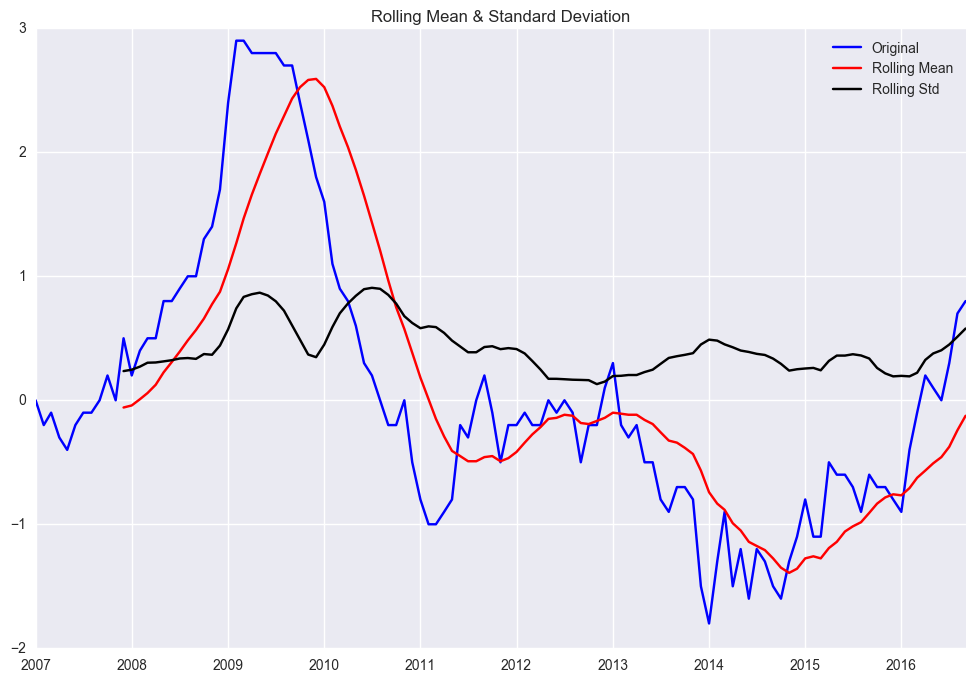

Results of Dickey-Fuller Test:
Test Statistic                  -1.690762
p-value                          0.435878
#Lags Used                      12.000000
Number of Observations Used    104.000000
Critical Value (5%)             -2.889758
Critical Value (1%)             -3.494850
Critical Value (10%)            -2.581822
dtype: float64


In [11]:
df['Harrisburg_seasonal_difference'] = df.Harrisburg_UR - df.Harrisburg_UR.shift(12)  
test_stationarity(df.Harrisburg_seasonal_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


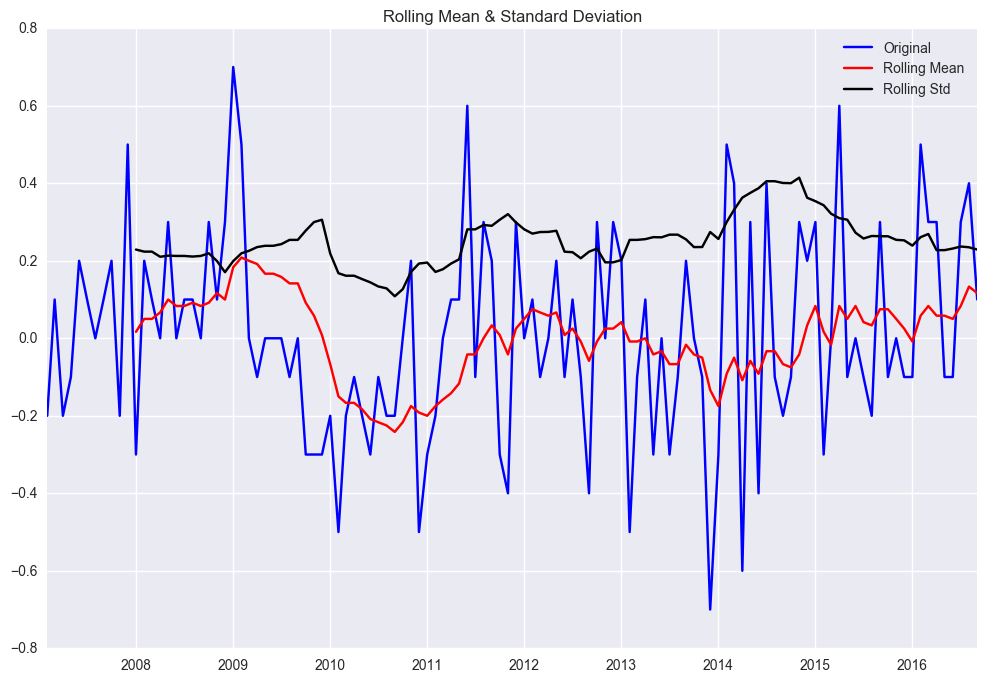

Results of Dickey-Fuller Test:
Test Statistic                  -2.906909
p-value                          0.044550
#Lags Used                      11.000000
Number of Observations Used    104.000000
Critical Value (5%)             -2.889758
Critical Value (1%)             -3.494850
Critical Value (10%)            -2.581822
dtype: float64


In [12]:
df['Harrisburg_seasonal_first_difference'] = df.Harrisburg_first_difference - df.Harrisburg_first_difference.shift(12)  
test_stationarity(df.Harrisburg_seasonal_first_difference.dropna(inplace=False))

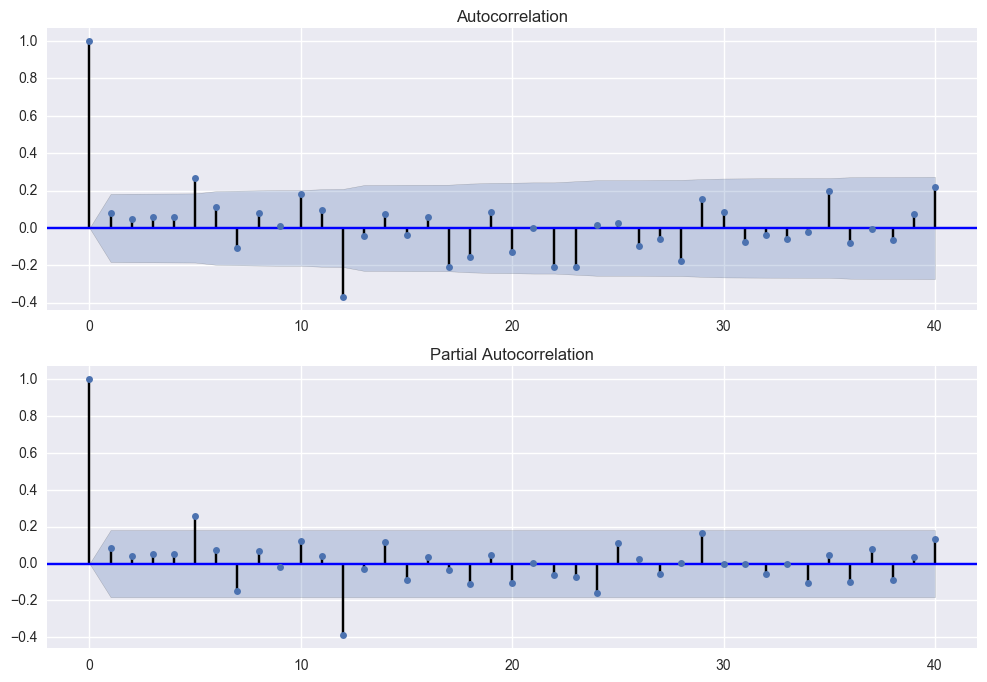

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Harrisburg_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Harrisburg_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [14]:
mod = sm.tsa.statespace.SARIMAX(df.Harrisburg_UR, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                      Harrisburg_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                   4.783
Date:                            Fri, 23 Dec 2016   AIC                             -5.566
Time:                                    10:43:19   BIC                              0.153
Sample:                                01-01-2006   HQIC                            -3.242
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7422      0.101     -7.362      0.000      -0.940      -0.545
sigma2         0.0496      0.007   

In [15]:
mod = sm.tsa.statespace.SARIMAX(df.Harrisburg_UR, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                      Harrisburg_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                   6.175
Date:                            Fri, 23 Dec 2016   AIC                             -6.350
Time:                                    10:43:25   BIC                              2.229
Sample:                                01-01-2006   HQIC                            -2.864
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2263      0.170      1.333      0.183      -0.106       0.559
ma.S.L12      -0.9928      3.107   

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


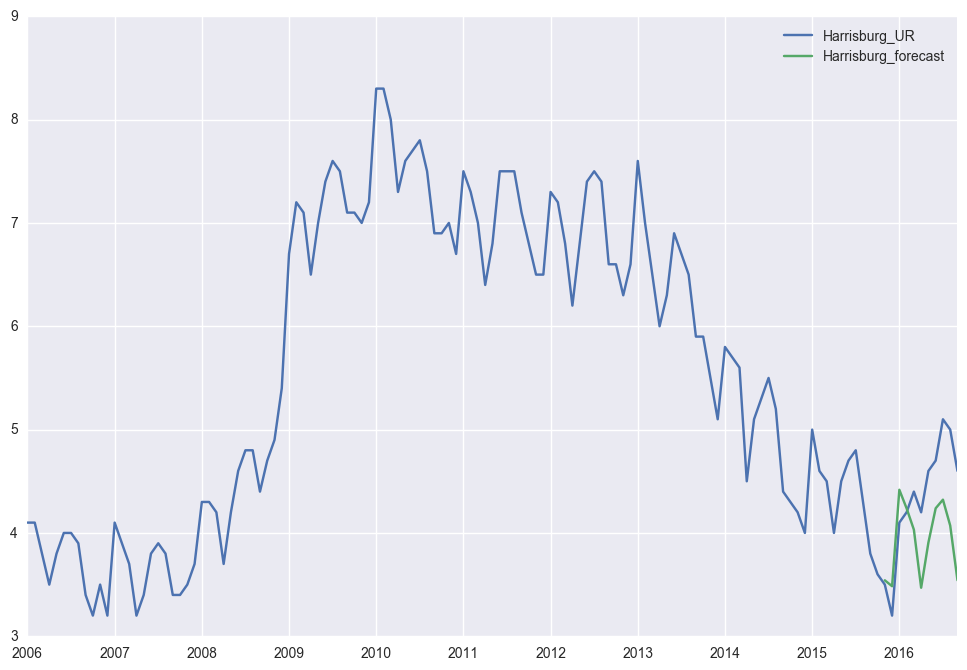

In [16]:
df['Harrisburg_forecast'] = results.predict(start = 118, end= 130, dynamic= True)  
df[['Harrisburg_UR', 'Harrisburg_forecast']].plot(figsize=(12, 8)) 
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

In [17]:
df

,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,USA_LF,USA_UR,Harrisburg_first_difference,Harrisburg_seasonal_difference,Harrisburg_seasonal_first_difference,Harrisburg_forecast
2006-01-01,360198,4.7,1014866,4.9,245718,3.8,276661,4.1,150214,4.7,NaN,NaN,NaN,NaN
2006-02-01,362938,5.0,1021495,5.2,247942,4.1,276445,4.1,150641,4.8,0.0,NaN,NaN,NaN
2006-03-01,364353,4.5,1027071,4.7,249102,3.7,278255,3.8,150813,4.7,-0.3,NaN,NaN,NaN
2006-04-01,366655,4.5,1032285,4.7,248950,3.7,278101,3.5,150881,4.7,-0.3,NaN,NaN,NaN
2006-05-01,370078,4.7,1040587,4.9,251530,3.9,281095,3.8,151069,4.6,0.3,NaN,NaN,NaN
2006-06-01,370414,5.1,1042765,5.3,254221,4.2,284704,4.0,151354,4.6,0.2,NaN,NaN,NaN
2006-07-01,373952,5.4,1049796,5.4,257485,4.4,287259,4.0,151377,4.7,0.0,NaN,NaN,NaN
2006-08-01,372268,5.1,1054405,5.2,256076,4.2,287051,3.9,151716,4.7,-0.1,NaN,NaN,NaN
2006-09-01,369509,4.7,1056308,4.8,255396,3.8,282479,3.4,151662,4.5,-0.5,NaN,NaN,NaN
2006-10-01,373487,4.4,1065042,4.6,256627,3.7,281671,3.2,152041,4.4,-0.2,NaN,NaN,NaN


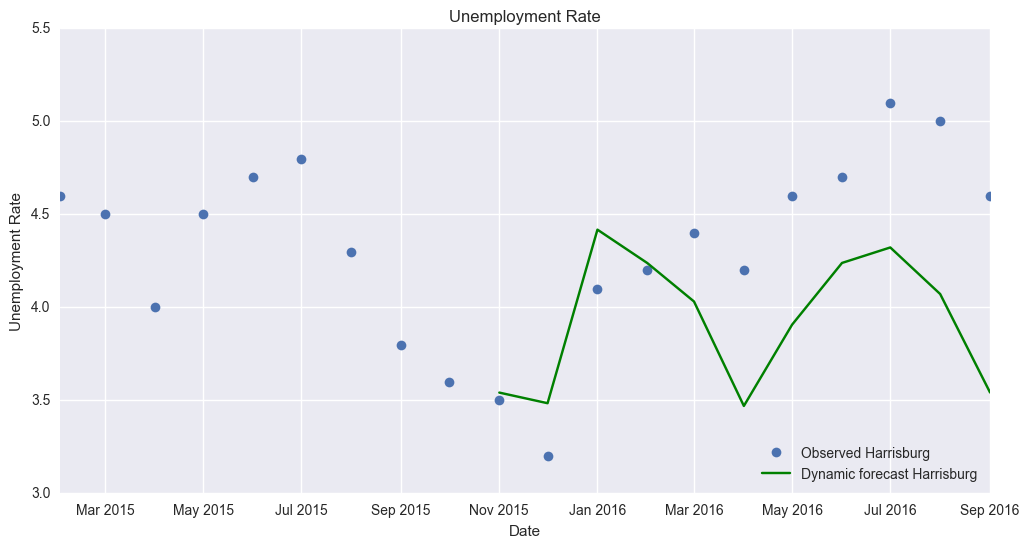

In [18]:
npredict =df.Harrisburg_UR['2016'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Unemployment Rate', xlabel='Date', ylabel='Unemployment Rate')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'Harrisburg_UR'], 'o', label='Observed Harrisburg') 
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'Harrisburg_forecast'], 'g', label='Dynamic forecast Harrisburg')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [19]:
start = datetime.datetime.strptime("2016-11-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,62)]
future = pd.DataFrame(index=date_list, columns= df.columns)

In [20]:
df_new = pd.concat([df, future])

In [21]:
df_new

,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,USA_LF,USA_UR,Harrisburg_first_difference,Harrisburg_seasonal_difference,Harrisburg_seasonal_first_difference,Harrisburg_forecast
2006-01-01,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,150214.0,4.7,NaN,NaN,NaN,NaN
2006-02-01,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,150641.0,4.8,0.0,NaN,NaN,NaN
2006-03-01,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,150813.0,4.7,-0.3,NaN,NaN,NaN
2006-04-01,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,150881.0,4.7,-0.3,NaN,NaN,NaN
2006-05-01,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,151069.0,4.6,0.3,NaN,NaN,NaN
2006-06-01,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,151354.0,4.6,0.2,NaN,NaN,NaN
2006-07-01,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,151377.0,4.7,0.0,NaN,NaN,NaN
2006-08-01,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,151716.0,4.7,-0.1,NaN,NaN,NaN
2006-09-01,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,151662.0,4.5,-0.5,NaN,NaN,NaN
2006-10-01,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,152041.0,4.4,-0.2,NaN,NaN,NaN


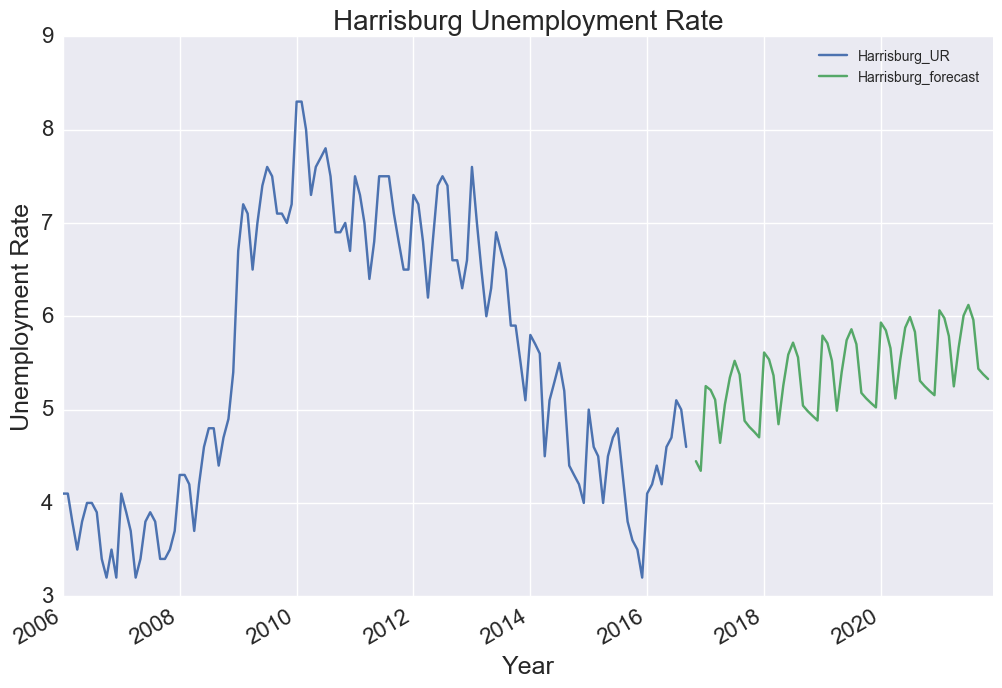

In [26]:
df_new['Harrisburg_forecast'] = results.predict(start = 129, end = 190, dynamic= True)  
df_new[['Harrisburg_UR', 'Harrisburg_forecast']].ix[-191:].plot(figsize=(12, 8)).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate', fontsize=18)
plt.title('Harrisburg Unemployment Rate', fontsize=20)
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.savefig('Harrisburg Unemployment Rate.jpeg', bbox_inches='tight')

In [23]:
df_new

,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,USA_LF,USA_UR,Harrisburg_first_difference,Harrisburg_seasonal_difference,Harrisburg_seasonal_first_difference,Harrisburg_forecast
2006-01-01,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,150214.0,4.7,NaN,NaN,NaN,NaN
2006-02-01,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,150641.0,4.8,0.0,NaN,NaN,NaN
2006-03-01,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,150813.0,4.7,-0.3,NaN,NaN,NaN
2006-04-01,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,150881.0,4.7,-0.3,NaN,NaN,NaN
2006-05-01,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,151069.0,4.6,0.3,NaN,NaN,NaN
2006-06-01,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,151354.0,4.6,0.2,NaN,NaN,NaN
2006-07-01,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,151377.0,4.7,0.0,NaN,NaN,NaN
2006-08-01,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,151716.0,4.7,-0.1,NaN,NaN,NaN
2006-09-01,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,151662.0,4.5,-0.5,NaN,NaN,NaN
2006-10-01,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,152041.0,4.4,-0.2,NaN,NaN,NaN
